In [2]:
# train_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import joblib

# Load the dataset
df = pd.read_csv("Salary Data.csv")  # Change this to your actual CSV filename

# Check for nulls
df = df.dropna()

# Initialize label encoders
edu_encoder = LabelEncoder()
job_encoder = LabelEncoder()

# Encode categorical columns
df['Education_Level_Encoded'] = edu_encoder.fit_transform(df['Education Level'])
df['Job_Title_Encoded'] = job_encoder.fit_transform(df['Job Title'])

# Feature matrix (X) and target vector (y)
X = df[['Education_Level_Encoded', 'Job_Title_Encoded', 'Years of Experience']]
y = df['Salary']  # Assumed to exist in the dataset

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model and encoders
joblib.dump(model, "salary_model.pkl")
joblib.dump(edu_encoder, "edu_encoder.pkl")
joblib.dump(job_encoder, "job_encoder.pkl")

print("✅ Model and encoders saved successfully.")


✅ Model and encoders saved successfully.


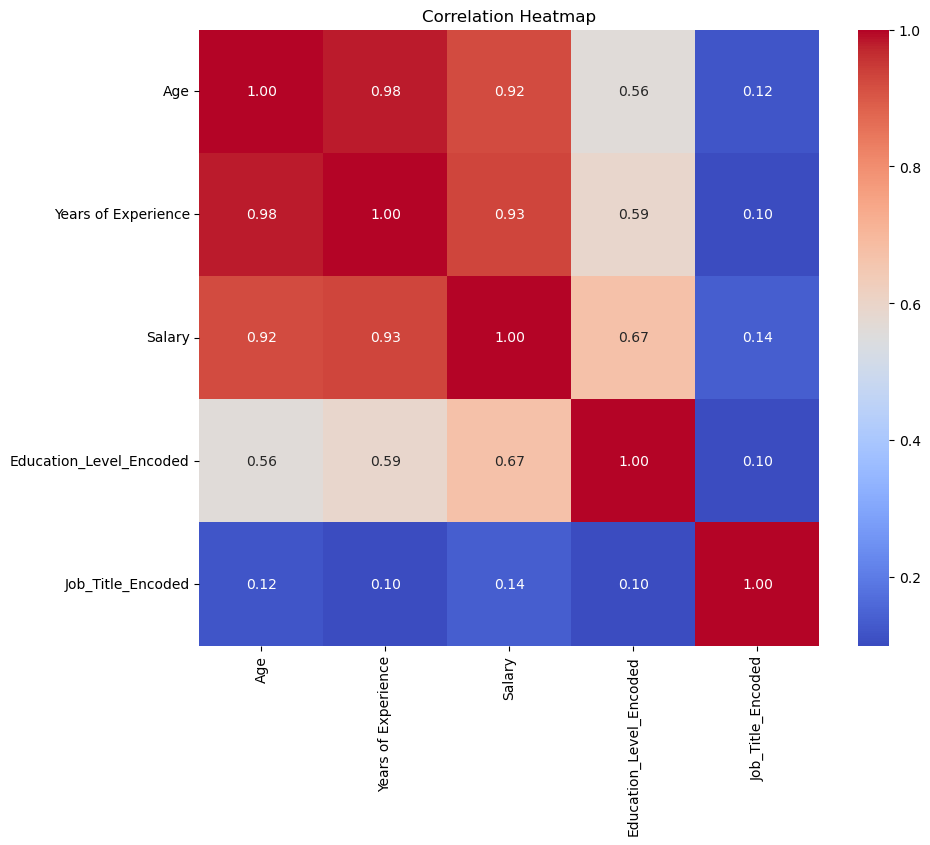

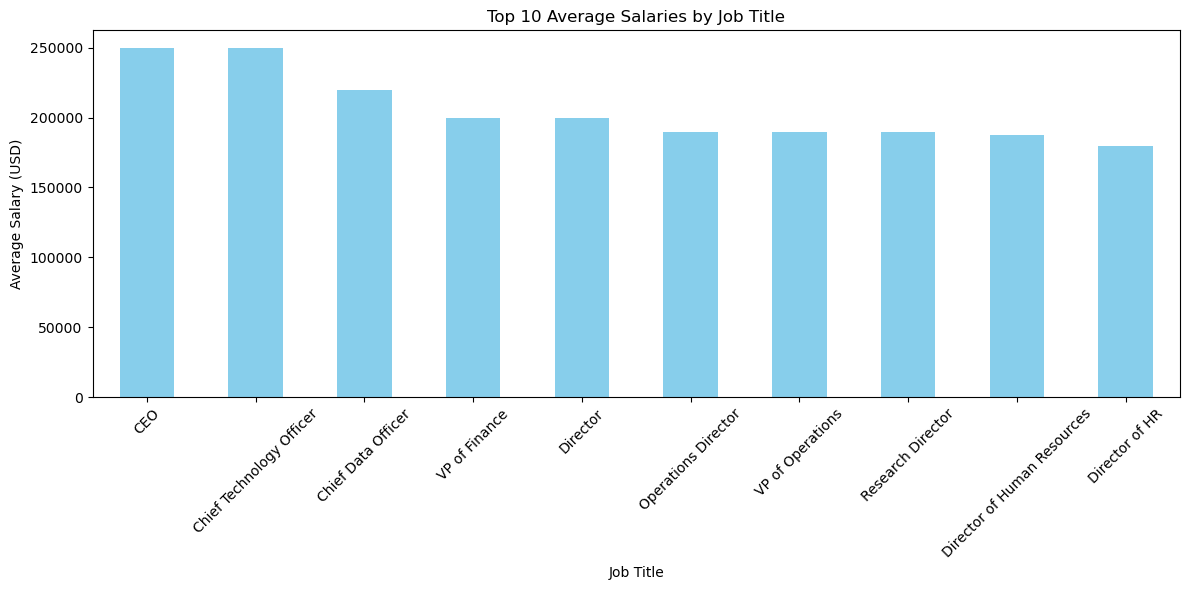

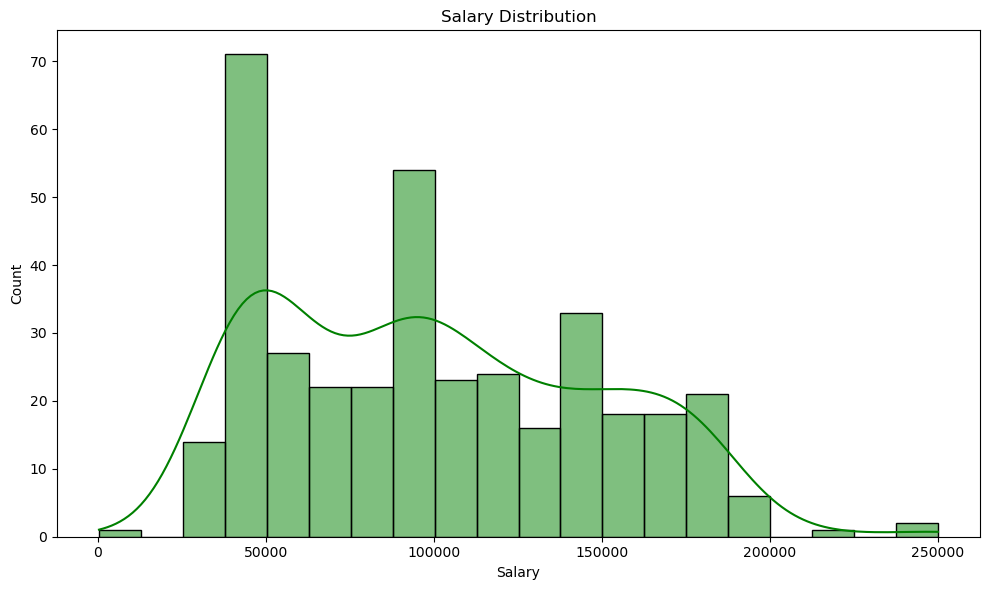

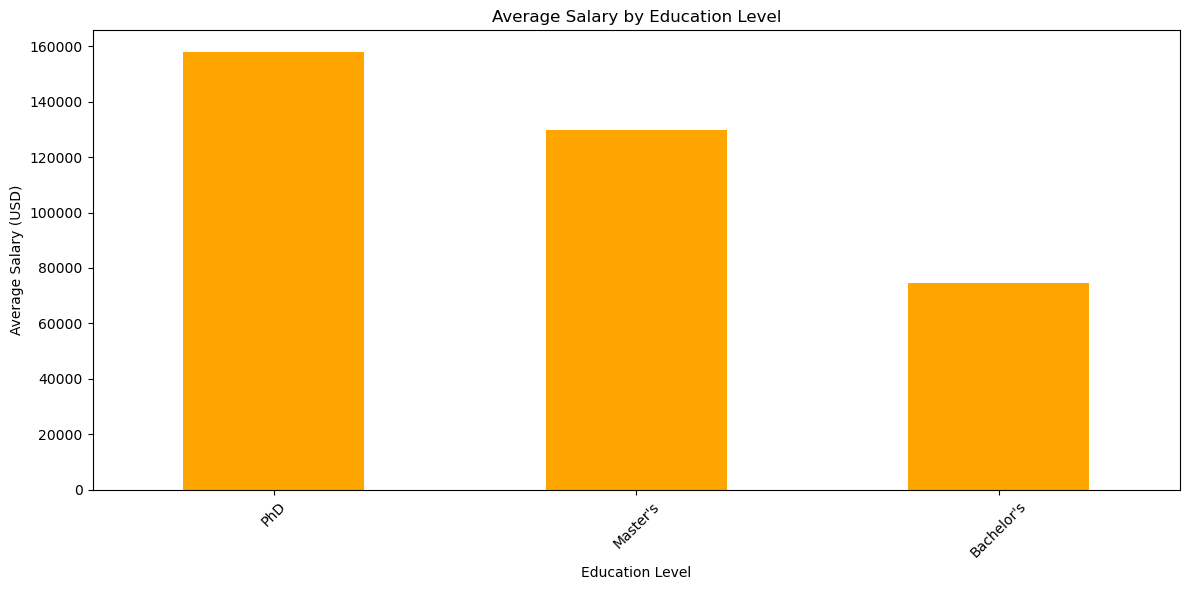

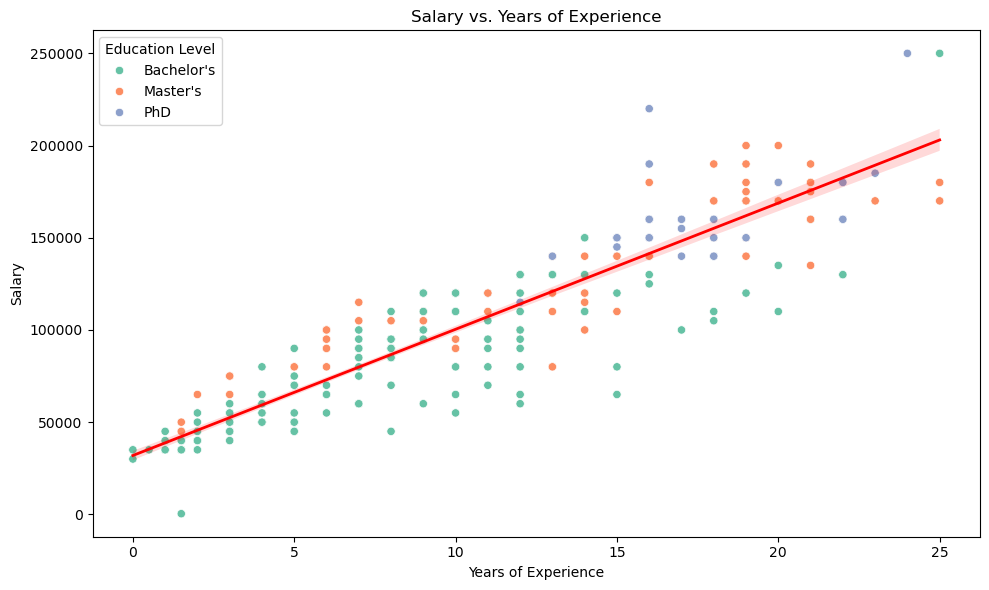

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 1. Bar chart for top 10 average salaries by job title
plt.figure(figsize=(12, 6))
avg_salary_by_role = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)
avg_salary_by_role.plot(kind='bar', color='skyblue')
plt.title('Top 10 Average Salaries by Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Count plot of salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True, color='green')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Bar chart for average salary by education level
plt.figure(figsize=(12, 6))
avg_salary_by_edu = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)
avg_salary_by_edu.plot(kind='bar', color='orange')
plt.title('Average Salary by Education Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Scatter plot: Salary vs. Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, hue='Education Level', palette='Set2')
sns.regplot(x='Years of Experience', y='Salary', data=df, scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


In [4]:
df['Salary'].min()

350.0